In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.colors

import dateutil.parser

In [2]:
def time_converter(data, minute=False):
    x = data.split('-')
    if len(x)==1:
        d = 0
        x = x[0]
    else:
        d = int(x[0])
        x = x[1]
    h,m,s = map(int,x.split(':'))
    if minute == True:
        return (d*24 + h)*60 + m + s/60
    return ((d*24 + h)*60+m)*60+s

In [3]:
def memory_size_converter(size):
    giga = True
    if 'M' in size:
        giga = False
    num = float(size.rstrip('MnG'))
    if giga:
        return num*1024
    return num

In [4]:
df = pd.read_excel('xnat_accre_full_stats.xlsx')

In [5]:
df.head()

,jobstartdate,jobSubmitDate,id,proctype,memused,input(MB),output(MB),walltime(min),JobID,Submit,...,ExitCode,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList
0,2018-01-01,2017-12-22,VUIISXNAT02_E226662,MaCRUISE_Parcel_v2,4631908,7.0,253.0,408.316667,23101185,2018-01-01T15:01:37,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp1044
1,2018-01-01,2017-12-22,VUIISXNAT02_E226752,MaCRUISE_Parcel_v2,4212364,5.9,198.0,238.000000,23101253,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp201
2,2018-01-01,2017-12-22,VUIISXNAT02_E226788,MaCRUISE_Parcel_v2,4146228,5.4,198.0,236.700000,23101254,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp202
3,2018-01-01,2017-12-22,VUIISXNAT02_E226806,MaCRUISE_Parcel_v2,4432564,7.6,220.0,287.683333,23101255,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp205
4,2018-01-01,2017-12-22,VUIISXNAT02_E226824,MaCRUISE_Parcel_v2,3963128,6.6,158.0,154.983333,23101252,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp211


In [6]:
df['Timelimit_num'] = df['Timelimit'].astype(str)
df['Timelimit_num'] = df.Timelimit_num.apply(time_converter)

In [7]:
df['proctype'].unique()

array(['MaCRUISE_Parcel_v2', 'FMRIQA_v4', 'MaCRUISE_v3',
       'Seeleyfmripreproc_v3', 'Multi_Atlas_v2', 'NDW_VBM_v1', 'dtiQA_v6',
       'bedpostx_v3', 'FSL_First', 'VBMQA', 'dtiQA_v2', 'Multi_Atlas',
       'fMRIQA_v2', 'fMRIQA_v3', 'MAGM_Coreg_Normalize_v2',
       'FMRI_conncalc_JS_FEPH_PWR264_v1', 'fmri_graph_JS_v1', 'dtiQA_v4',
       'Probtrackx2_v2_sevenrois', 'Probtrackx2_RAS_v2_RAS_sevenrois',
       'FTI_v1', 'dtiQA_v3', 'MaCRUISE_v2',
       'fMRI_Connectivity_PreProcess_Scan_v2', 'Bedpost_v1',
       'fMRI_Connectivity_Process_Scan_v3',
       'fMRI_Connectivity_Process_Scan_v3_ma132',
       'fMRI_Thalpartialconn_v1', 'Probtrackx2_v1',
       'Probtrackx2_RAS_v1_RAS', 'Probtrackx2_RAS_v1_NC',
       'Probtrackx2_v1_ARAS', 'Seeleyfmripreproc_v2', 'fMRIQA',
       'fMRI_Preprocess_DND', 'BrainAge_singularity_v1',
       'curve_labeling_v2', 'Dortch_Leg_v1', 'surf_quant_FS_v1',
       'Temporal_Lobe_v3', 'MAGM_Normalize_v1', 'Probtrackx_ARAS_v2',
       'Cerebellum_Segmenta

### Plot the memory requirements of every proctype

In [8]:
df['ReqMem_num'] = df.ReqMem.apply(memory_size_converter)
df = df[df['memused'].notnull()].copy()
df['memused'] = df['memused'].astype(str)
df = df[df.memused.apply(lambda x: x.isnumeric())]
df['memused'] =  pd.to_numeric(df['memused']) / 1024

In [9]:
df.groupby('proctype')['memused'].max() - df.groupby('proctype')['memused'].min()

proctype
AbOrganSeg_Localized_v1                        0.000000
AbOrganSeg_Whole_v1                        12076.484375
AbOrganSeg_Whole_v2                        22152.261719
Bedpost_v1                                   299.660156
BrainAge_singularity_v1                      964.183594
Cerebellum_Segmentation_v2                     0.000000
Dortch_Leg_v1                               2211.187500
FMRIQA_v4                                   9958.861328
FMRI_conncalc_C840_v1                       6635.601562
FMRI_conncalc_CCinsula_C341_v1              1056.531250
FMRI_conncalc_JS_FEPH_PWR264_v1             5567.578125
FSL_First                                   1046.156250
FTI_v1                                      7945.050781
Generic_FMRI_v2                              566.445312
MAGM_Coreg_Normalize_v2                      477.714844
MAGM_Normalize_v1                            213.449219
MaCRUISE_Parcel_v2                           992.625000
MaCRUISE_v2                            

In [10]:
selected_aps = ['dtiQA_v3', 'dtiQA_v2', 'surf_quant_FS_v1', 'Multi_Atlas',
                'FMRIQA_v4', 'curve_labeling_v2', 'MaCRUISE_v3', 'bedpostx_v3']
dfset = df[df['proctype'].isin(selected_aps)]

# set colors for the apps to highlight SLANT
my_pallette = {}
for ap in selected_aps:
    my_pallette[ap] = "palevioletred"

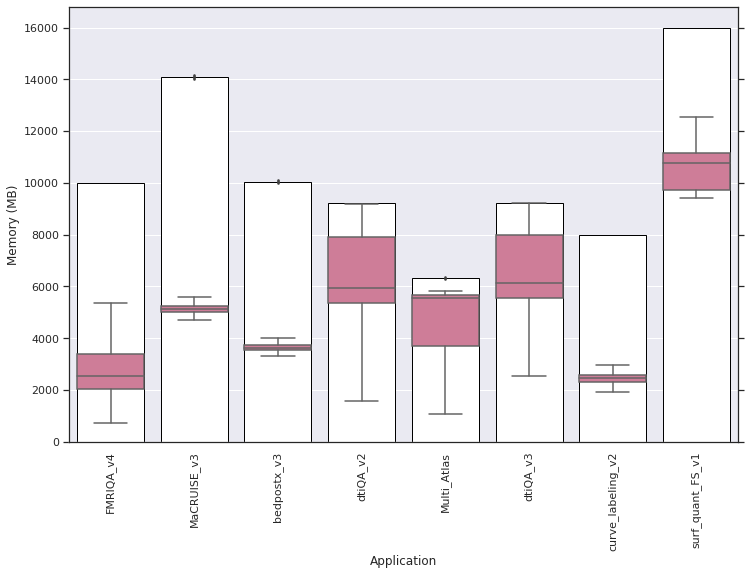

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")

ax = sns.barplot(x="proctype", y="ReqMem_num", data=dfset,
                 color = 'w', edgecolor='black')
ax2 = ax.twinx()
ax2 = sns.boxplot(x="proctype", y="memused", data=dfset,
                  showfliers=False, palette=my_pallette)

plt.grid(False)
ax2.set_ylim(ax.get_ylim())
ax.set_xlabel('Application')
ax.set_ylabel('Memory (MB)')
#ax2.set_ylabel('Requested memory (MB)')
ax2.set_ylabel('')
plt.setp(ax2.get_yticklabels(), visible=False)
ax.tick_params(axis='x', rotation=90)

#plt.savefig("figures/memory_usage.png", bbox_inches = 'tight')
plt.show()

### Read the timeout log and plot timeout runs compared to application behavior

In [12]:
dataset = "VBMQA"
data = pd.Series(np.loadtxt("../workload/ACCRE/"+dataset+".out", delimiter=' '))

In [13]:
old_data = pd.read_csv("./2016_%s.csv" %(dataset))
old_data["memused"] = old_data["input(MB)"] + old_data["output"]
old_data['walltime_min'] = old_data['walltime'].astype(str)
old_data['walltime_min'] = old_data.walltime_min.apply(time_converter, minute=True)
old_data.head()

,Unnamed: 0,walltime,input(MB),output,memused,walltime_min
0,6951,00:18:39,0.0,30.0,30.0,18.650000
1,23233,00:15:15,1.3,13.0,14.3,15.250000
2,23837,00:10:39,2.3,8.5,10.8,10.650000
3,23838,00:10:36,2.3,11.0,13.3,10.600000
4,24011,00:15:53,2.6,19.0,21.6,15.883333


In [14]:
reqtime = df[df.proctype == dataset]['Timelimit_num'].unique() # in seconds
reqmem = df[df.proctype == dataset]['ReqMem_num'].unique() # in MB
df[df.proctype == dataset].head()

,jobstartdate,jobSubmitDate,id,proctype,memused,input(MB),output(MB),walltime(min),JobID,Submit,...,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Timelimit_num,ReqMem_num
791,2018-01-06,2018-01-06,VUIISXNAT02_E233066,VBMQA,1356.582031,6.0,34.0,55.733333,23264341,2018-01-06T17:26:15,...,1,1,1,2Gn,NaN,"cpu=1,mem=2G,node=1",01:00:00,vmp1018,3600,2048.0
4877,2018-01-24,2018-01-24,VUIISXNAT04_E00551,VBMQA,1334.257812,6.5,37.0,20.816667,24026006,2018-01-25T03:01:30,...,1,1,1,2Gn,NaN,"cpu=1,mem=2G,node=1",01:00:00,vmp1062,3600,2048.0
5045,2018-02-08,2018-02-08,VUIISXNAT04_E04023,VBMQA,1290.519531,5.2,31.0,19.600000,24487007,2018-02-08T08:01:59,...,1,1,1,2Gn,NaN,"cpu=1,mem=2G,node=1",01:00:00,vmp1078,3600,2048.0
5049,2018-02-08,2018-02-08,VUIISXNAT04_E04034,VBMQA,1344.726562,5.9,33.0,20.016667,24487005,2018-02-08T08:01:58,...,1,1,1,2Gn,NaN,"cpu=1,mem=2G,node=1",01:00:00,vmp1077,3600,2048.0
5053,2018-02-08,2018-02-08,VUIISXNAT04_E04050,VBMQA,1319.234375,6.3,35.0,20.300000,24504820,2018-02-08T20:01:37,...,1,1,1,2Gn,NaN,"cpu=1,mem=2G,node=1",01:00:00,vmp1025,3600,2048.0


In [15]:
dfset = df[df.proctype == dataset]

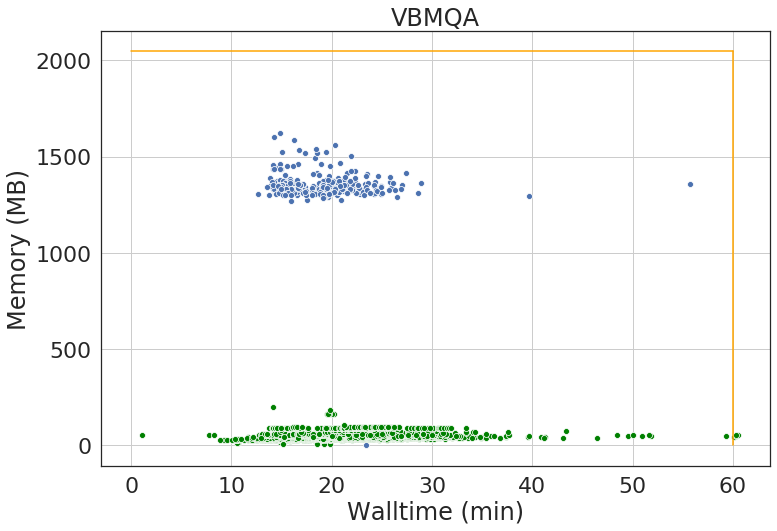

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.scatterplot(y="memused", x="walltime(min)",
                     data=dfset)

ax = sns.scatterplot(y="memused", x="walltime_min",
                     data=old_data,
                     color = 'green')

# set the request times
for i in reqtime:
    # time in database is in min
    plt.plot([i/60, i/60], [0, max(reqmem)], color='orange')
for i in reqmem:
    plt.plot([0, max(reqtime)/60], [i, i], color='orange')

plt.grid(True)
ax.set_xlabel('Walltime (min)')
ax.set_ylabel('Memory (MB)')
ax.set_title(dataset)

#plt.savefig("figures/%s.png" %(dataset))
plt.show()

# Plot wait time to requested memory

In [17]:
accre_node_mem = np.array([48, 64, 96, 128, 256]) * 1024
accre_node_mem

array([ 49152,  65536,  98304, 131072, 262144])

In [18]:
df.columns

Index(['jobstartdate', 'jobSubmitDate', 'id', 'proctype', 'memused',
       'input(MB)', 'output(MB)', 'walltime(min)', 'JobID', 'Submit',
       'Eligible', 'Start', 'End', 'Elapsed', 'ExitCode', 'State', 'NNodes',
       'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES', 'ReqTRES', 'Timelimit',
       'NodeList', 'Timelimit_num', 'ReqMem_num'],
      dtype='object')

In [19]:
len(df)

20778

In [20]:
def datetime_to_minutes(d):
    return d.seconds/60

df['Start_dt'] = df.Start.apply(dateutil.parser.parse)
df['Submit_dt'] = df.Submit.apply(dateutil.parser.parse)
df["WaitTime(min)"] = df['Start_dt'] - df['Submit_dt']
df['WaitTime(min)'] = df["WaitTime(min)"].apply(datetime_to_minutes)

### Create bins of memory / time requests

In [21]:
df["Timelimit_num"].unique()/60

array([  720.,   360.,   600.,  2880., 14400., 13200.,    60.,  2160.,
        5760.,    30.,   240.,  1440., 11520.,  7200., 17280.,   120.,
        4320.,  8640.,  3000.,  3600.,   480., 10800.])

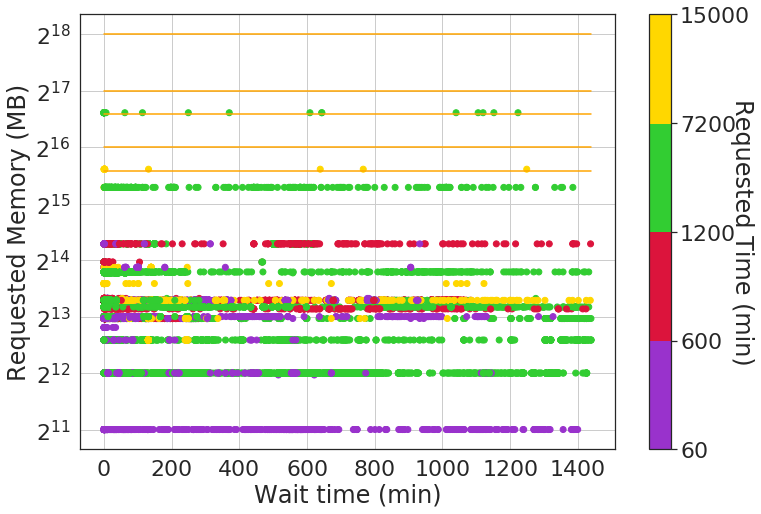

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")

bounds = [60, 600, 1200, 7200, 15000]
colors = ["darkorchid", "crimson", "limegreen", "gold"]
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, len(colors))

sc = ax.scatter(df["WaitTime(min)"], df.ReqMem_num,
                c=df.Timelimit_num.values/60, cmap=cmap, norm=norm)

# set the ACCRE resources
for i in accre_node_mem:
    plt.plot([0, df["WaitTime(min)"].max()], [i, i], color='orange')

cbar = fig.colorbar(sc, spacing="uniform")
cbar.ax.set_ylabel('Requested Time (min)', rotation=270)

plt.grid(True)
ax.set_xlabel('Wait time (min)')
ax.set_ylabel('Requested Memory (MB)')

ax.set_yscale('log', basey=2)
plt.savefig("figures/wait_time_memory_all.png")
plt.show()

In [23]:
df["ReqMem_num"].unique()

array([ 16000.,  10000.,  10240.,  20000.,   6144.,  40000.,  14168.,
        12288.,   2048.,   9216.,   8192.,   4096.,   8000.,  14000.,
        50000.,   7168.,   8100.,  15000.,   9000.,   4000., 100000.])

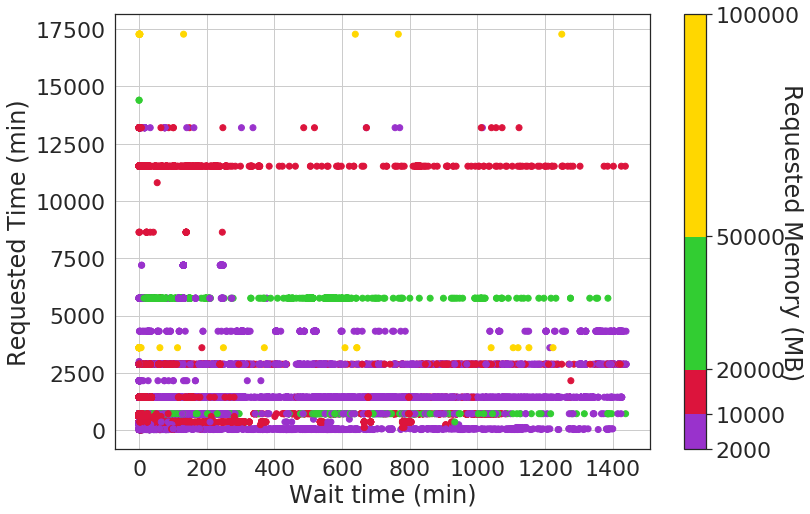

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")

bounds = [2000, 10000, 20000, 50000, 100000]
colors = ["darkorchid", "crimson", "limegreen", "gold"]
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, len(colors))

sc = ax.scatter(df["WaitTime(min)"], df.Timelimit_num/60,
                c=df.ReqMem_num.values, cmap=cmap, norm=norm)

cbar = fig.colorbar(sc, spacing="proportional")
cbar.ax.set_ylabel('Requested Memory (MB)', rotation=270)

plt.grid(True)
ax.set_xlabel('Wait time (min)')
ax.set_ylabel('Requested Time (min)')

plt.savefig("figures/wait_time_walltime_all.png")
plt.show()

# Wait time for a particular dataset

In [25]:
# find applications requesting large amounts of memory
df[df.ReqMem_num >= 49152]["proctype"].unique()

array(['Multi_Atlas_v2', 'MaCRUISE_v3', 'AbOrganSeg_Whole_v1',
       'AbOrganSeg_Whole_v2'], dtype=object)

In [26]:
dataset = "dtiQA_v6"
df[df.proctype == dataset]["ReqMem_num"].unique()

array([10000., 20000., 40000.])

In [27]:
df[df.proctype == dataset]["Timelimit_num"].unique()

array([ 36000, 345600])

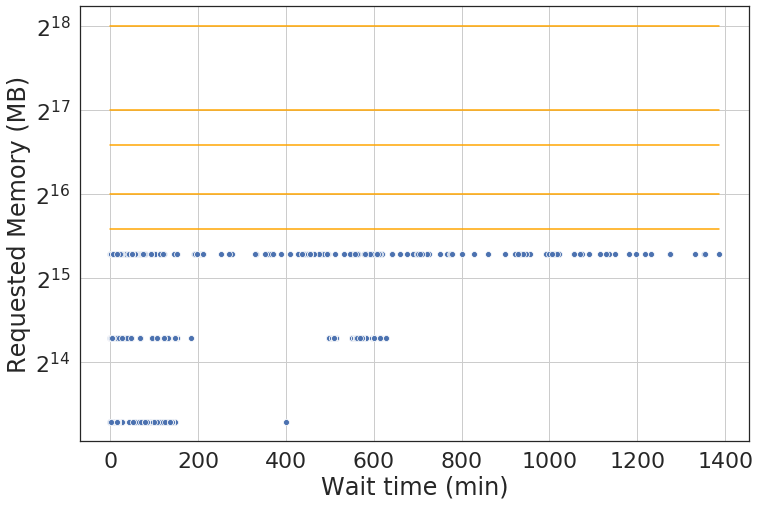

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.scatterplot(y="ReqMem_num", x="WaitTime(min)",
                     data=df[df.proctype == dataset])

# set the ACCRE resources
for i in accre_node_mem:
    plt.plot([0, df[df.proctype == dataset]["WaitTime(min)"].max()], [i, i], color='orange')

plt.grid(True)
ax.set_xlabel('Wait time (min)')
ax.set_ylabel('Requested Memory (MB)')

ax.set_yscale('log', basey=2)
plt.savefig("figures/wait_time_%s.png" %(dataset))
plt.show()